Downloaded dataset from [DBPedia Short Abstracts - 2020.07.01](https://downloads.dbpedia.org/repo/dbpedia/text/short-abstracts/2020.07.01/short-abstracts_lang=en.ttl.bz2)

In [1]:
from tqdm.notebook import tqdm
import pandas as pd
from time import time

# Process and format DBPedia dataset

In [2]:
cnt = 0

p1s = []
p11s = []
p2s = []
lines = []
with open("../data/short-abstracts_lang=en.ttl", 'r', encoding='utf-8') as f:
    for line in tqdm(f):
        p1 = line[:line.find(" ")]
#         p11 = p1.split("/")[-1][:-1]
        p11 = p1[len("<http://dbpedia.org/resource/"):][:-1]
        line = line[line.find(" ")+1:]
        p2 = line[:line.find(" ")]
        line = line[line.find(" ")+1:line.rfind(" ")][1:-4]
#         print(p1, p2, line)
        p1s.append(p1)
        p11s.append(p11)
        p2s.append(p2)
        lines.append(line)
#         except UnicodeDecodeError:
#             cnt += 1
# print("Encoding error:", cnt)

0it [00:00, ?it/s]

In [3]:
df1 = pd.DataFrame({'urlComp': p11s, 'url':p1s, 'p2': p2s, 'abstract': lines})
df1.to_csv('../data/short-abstracts_lang=en.csv')

In [15]:
df1 = pd.read_csv("../data/short-abstracts_lang=en.csv", skiprows=1, skipfooter=1, header=None, engine='python')

In [16]:
df1.columns = ['ignore', 'node1', 'url', 'ignore2', 'abstract']

In [17]:
df1 = df1.set_index('node1')

In [18]:
df1.head()

,ignore,url,ignore2,abstract
node1,,,,
NaN,0,#,started,NaN
Animalia_(book),1,<http://dbpedia.org/resource/Animalia_(book)>,<http://www.w3.org/2000/01/rdf-schema#comment>,Animalia is an illustrated children's book by ...
Agricultural_science,2,<http://dbpedia.org/resource/Agricultural_scie...,<http://www.w3.org/2000/01/rdf-schema#comment>,Agricultural science is a broad multidisciplin...
Albedo,3,<http://dbpedia.org/resource/Albedo>,<http://www.w3.org/2000/01/rdf-schema#comment>,"Albedo () (Latin: albedo, meaning 'whiteness')..."
Alain_Connes,4,<http://dbpedia.org/resource/Alain_Connes>,<http://www.w3.org/2000/01/rdf-schema#comment>,Alain Connes (French: [alɛ̃ kɔn]; born 1 April...


In [19]:
df1[df1.url.apply(lambda p: 'http://dbpedia.org/resource' not in p)]


,ignore,url,ignore2,abstract
node1,,,,
NaN,0,#,started,NaN


In [20]:
print(f"DBPedia dataset has {len(df1)} records with unique {df1.index.nunique()} index values")


DBPedia dataset has 5732949 records with unique 5732947 index values


In [21]:
df1.loc[df1[df1.index.duplicated()].index]

,ignore,url,ignore2,abstract
node1,,,,
NaN,0,#,started,NaN
NaN,23399,<http://dbpedia.org/resource/NaN>,<http://www.w3.org/2000/01/rdf-schema#comment>,"In computing, NaN, standing for Not a Number, ..."


There are many duplicate element names with different abstracts. For example, 390 corresponds to year 390, ibm 390 systemss.

# Wikidata Sitelinks

In [22]:
sitelinksDF = pd.read_csv("../data/sitelinks.en.tsv.gz", sep='\t')

In [23]:
sitelinksDF['trimmedNode2'] = sitelinksDF.node2.apply(lambda p: p.split("/")[-1] if p.split("/")[-1] != '' else p.split("/")[-2])

In [24]:
sitelinksDF1 = sitelinksDF[sitelinksDF.label == 'wikipedia_sitelink']

In [25]:
sitelinksDF2 = sitelinksDF1.set_index('trimmedNode2')

In [26]:
sitelinksDF2.head()

,id,node1,label,node2
trimmedNode2,,,,
Universe,Q1-wikipedia_sitelink-5e459a-0,Q1,wikipedia_sitelink,http://en.wikipedia.org/wiki/Universe
Boston,Q100-wikipedia_sitelink-c612f2-0,Q100,wikipedia_sitelink,http://en.wikipedia.org/wiki/Boston
Gabon,Q1000-wikipedia_sitelink-b7f1ee-0,Q1000,wikipedia_sitelink,http://en.wikipedia.org/wiki/Gabon
Dutch_Wikipedia,Q10000-wikipedia_sitelink-16adbd-0,Q10000,wikipedia_sitelink,http://en.wikipedia.org/wiki/Dutch_Wikipedia
Cadier_en_Keer,Q100000-wikipedia_sitelink-d81a0a-0,Q100000,wikipedia_sitelink,http://en.wikipedia.org/wiki/Cadier_en_Keer


In [27]:
print(f"There are {len(sitelinksDF2)} sitelinks present in the dataset corresponding to {sitelinksDF2.node1.nunique()} unique node1s (Qxxx), {sitelinksDF2.index.nunique()} unique labels (text)")


There are 8472828 sitelinks present in the dataset corresponding to 8472828 unique node1s (Qxxx), 8401883 unique labels (text)


In [28]:
sitelinksDF2.loc[sitelinksDF2[sitelinksDF2.index.duplicated()].index]


KeyboardInterrupt



# Join DBPedia file with sitelinks - File X

In [ ]:
abstractsDF = df1.join(sitelinksDF2).reset_index()

In [ ]:
abstractsDF.head()

In [ ]:
len(abstractsDF), abstractsDF.index.nunique(), abstractsDF.node1.nunique()

In [ ]:
print(f"From {len(abstractsDF)} Qnodes, there are {abstractsDF.node2.isna().sum()} dbpedia statements which do not have a sitelink i.e {len(abstractsDF) - abstractsDF.node2.isna().sum()} have a sitelink")


# Similarity file

In [33]:
wordsimDF = pd.read_csv("../data/SimIP_new.csv")

In [34]:
wordsimDF.head()

,Index,g_qnode,p_qnode,q1_label,q2_label,complex,transe,text,class,node2vec-v0,H_3x6,H_5x8
0,11,Q17221,Q189290,spokesperson,military officer,0.25,0.11,0.62,0.65,0.27,0.68,0.45
1,3,Q702269,Q2285706,professional,head of government,0.29,0.39,0.59,0.57,0.13,0.47,0.29
2,5,Q2285706,Q82955,head of government,politician,0.36,0.26,0.84,0.55,0.05,0.61,0.64
3,11,Q107711,Q189290,firefighter,military officer,0.29,0.22,0.58,0.52,0.34,0.78,0.49
4,3,Q702269,Q48352,professional,head of state,0.30,0.27,0.61,0.52,0.04,0.49,0.33


In [35]:
wordsimQNodesList = set(wordsimDF.g_qnode.to_list() + wordsimDF.p_qnode.to_list())

In [36]:
print(f"From the similarity file having {len(wordsimDF)} records, we have list1 with {len(set(wordsimDF.g_qnode.to_list()))} unique Qnodes and list2 with {len(set(wordsimDF.p_qnode.to_list()))} unique Qnodes. Taking their union, we get {len(set(wordsimDF.g_qnode.to_list() + wordsimDF.p_qnode.to_list()))} unique Qnodes and by taking their intersection, we get {len(set(wordsimDF.g_qnode.to_list()).intersection(set(wordsimDF.p_qnode.to_list())))} unique Qnodes")


From the similarity file having 118 records, we have list1 with 19 unique Qnodes and list2 with 21 unique Qnodes. Taking their union, we get 31 unique Qnodes and by taking their intersection, we get 9 unique Qnodes


In [37]:
wordsimQNodesListDF1 = pd.DataFrame({'node1': list(wordsimQNodesList)}).set_index('node1')


# Filtering File X Qnodes using similarity file Qnodes list

In [25]:
abstractsDF1 = abstractsDF[abstractsDF.node1.apply(lambda p:p in wordsimQNodesList)]


In [26]:
abstractsDF1.head()

,index,ignore,url,ignore2,abstract,id,node1,label,node2
4002,100,159716,<http://dbpedia.org/resource/100>,<http://www.w3.org/2000/01/rdf-schema#comment>,100 or one hundred (Roman numeral: C) is the n...,Q37413-wikipedia_sitelink-c0dbd3-0,Q37413,wikipedia_sitelink,http://en.wikipedia.org/wiki/100
306492,5,1074621,<http://dbpedia.org/resource/5>,<http://www.w3.org/2000/01/rdf-schema#comment>,"5 (five) is a number, numeral, and glyph. It i...",Q203-wikipedia_sitelink-c8e811-0,Q203,wikipedia_sitelink,http://en.wikipedia.org/wiki/5
312986,7,103187,<http://dbpedia.org/resource/7>,<http://www.w3.org/2000/01/rdf-schema#comment>,7 (seven) is the natural number following 6 an...,Q23350-wikipedia_sitelink-6dd502-0,Q23350,wikipedia_sitelink,http://en.wikipedia.org/wiki/7
363000,Abuse,165447,<http://dbpedia.org/resource/Abuse>,<http://www.w3.org/2000/01/rdf-schema#comment>,Abuse is the improper usage or treatment of a ...,Q600571-wikipedia_sitelink-5719bc-0,Q600571,wikipedia_sitelink,http://en.wikipedia.org/wiki/Abuse
364696,Academic_discipline,1830099,<http://dbpedia.org/resource/Academic_discipline>,<http://www.w3.org/2000/01/rdf-schema#comment>,An academic discipline or academic field is a ...,Q11862829-wikipedia_sitelink-cdefe0-0,Q11862829,wikipedia_sitelink,http://en.wikipedia.org/wiki/Academic_discipline


In [27]:
print(f"Initially, there were {len(df1)} short abstracts. From {len(abstractsDF)} Qnodes with short abstracts, there are {len(abstractsDF1)} Qnodes which have some similarity measure")


Initially, there were 5732949 short abstracts. From 5785371 Qnodes with short abstracts, there are 324 Qnodes which have some similarity measure


In [28]:
absDFLabelList = abstractsDF1['index'].to_list()

In [29]:
abstractsDF1['index'].nunique()

324

# Join sitelinks with DBPedia file - File Y

In [30]:
abstractsDF2 = sitelinksDF2.join(df1).reset_index()

In [31]:
abstractsDF2.head()

,index,id,node1,label,node2,ignore,url,ignore2,abstract
0,,Q956244-wikipedia_sitelink-539183-0,Q956244,wikipedia_sitelink,http://en.wikipedia.org/wiki///,NaN,NaN,NaN,NaN
1,!!,Q353153-wikipedia_sitelink-d716fb-0,Q353153,wikipedia_sitelink,http://en.wikipedia.org/wiki/!!,NaN,NaN,NaN,NaN
2,!!!,Q371-wikipedia_sitelink-628937-0,Q371,wikipedia_sitelink,http://en.wikipedia.org/wiki/!!!,211415.0,<http://dbpedia.org/resource/!!!>,<http://www.w3.org/2000/01/rdf-schema#comment>,!!! ( chk-chk-chk) is an American dance-punk b...
3,!!!!!!!,Q91868926-wikipedia_sitelink-d58178-0,Q91868926,wikipedia_sitelink,http://en.wikipedia.org/wiki/!!!!!!!,NaN,NaN,NaN,NaN
4,!!!_(album),Q2705922-wikipedia_sitelink-e96003-0,Q2705922,wikipedia_sitelink,http://en.wikipedia.org/wiki/!!!_(album),584428.0,<http://dbpedia.org/resource/!!!_(album)>,<http://www.w3.org/2000/01/rdf-schema#comment>,!!! is the eponymous debut studio album by dan...


In [32]:
print(f"From {len(abstractsDF2)} Qnodes, there are {abstractsDF2.ignore2.isna().sum()} sitelink Qnodes which do not have a short abstract i.e {len(abstractsDF2) - abstractsDF2.ignore2.isna().sum()} have a short abstract")


From 8472828 Qnodes, there are 2741574 sitelink Qnodes which do not have a short abstract i.e 5731254 have a short abstract


# Join list of similarity file Qnodes with File Y

In [29]:
temp1 = sitelinksDF2.join(df1)

In [30]:
temp2 = temp1.reset_index().set_index('node1')

In [31]:
temp2.head()

,index,id,label,node2,ignore,url,ignore2,abstract
node1,,,,,,,,
Q956244,,Q956244-wikipedia_sitelink-539183-0,wikipedia_sitelink,http://en.wikipedia.org/wiki///,NaN,NaN,NaN,NaN
Q353153,!!,Q353153-wikipedia_sitelink-d716fb-0,wikipedia_sitelink,http://en.wikipedia.org/wiki/!!,NaN,NaN,NaN,NaN
Q371,!!!,Q371-wikipedia_sitelink-628937-0,wikipedia_sitelink,http://en.wikipedia.org/wiki/!!!,211415.0,<http://dbpedia.org/resource/!!!>,<http://www.w3.org/2000/01/rdf-schema#comment>,!!! ( chk-chk-chk) is an American dance-punk b...
Q91868926,!!!!!!!,Q91868926-wikipedia_sitelink-d58178-0,wikipedia_sitelink,http://en.wikipedia.org/wiki/!!!!!!!,NaN,NaN,NaN,NaN
Q2705922,!!!_(album),Q2705922-wikipedia_sitelink-e96003-0,wikipedia_sitelink,http://en.wikipedia.org/wiki/!!!_(album),584428.0,<http://dbpedia.org/resource/!!!_(album)>,<http://www.w3.org/2000/01/rdf-schema#comment>,!!! is the eponymous debut studio album by dan...


In [38]:
wordsimQNodesListWAbstractsDF = wordsimQNodesListDF1.join(temp2)

In [39]:
wordsimQNodesListWAbstractsDF.head()

,index,id,label,node2,ignore,url,ignore2,abstract
node1,,,,,,,,
Q11499147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q1048835,Political_division,Q1048835-wikipedia_sitelink-a3aa16-0,wikipedia_sitelink,http://en.wikipedia.org/wiki/Political_division,NaN,NaN,NaN,NaN
Q27096235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q48352,Head_of_state,Q48352-wikipedia_sitelink-0ba458-0,wikipedia_sitelink,http://en.wikipedia.org/wiki/Head_of_state,5945.0,<http://dbpedia.org/resource/Head_of_state>,<http://www.w3.org/2000/01/rdf-schema#comment>,A head of state (or chief of state) is the pub...
Q83307,Minister_(government),Q83307-wikipedia_sitelink-519dcf-0,wikipedia_sitelink,http://en.wikipedia.org/wiki/Minister_(governm...,243508.0,<http://dbpedia.org/resource/Minister_(governm...,<http://www.w3.org/2000/01/rdf-schema#comment>,A minister is a politician who heads a ministr...


In [40]:
wordsimQNodesListWAbstractsDF.abstract.isna().sum()

9

In [41]:
len(set(wordsimQNodesListWAbstractsDF[~wordsimQNodesListWAbstractsDF.abstract.isna()].index.to_list()))


22

In [42]:
len(set(wordsimQNodesListWAbstractsDF.index.to_list()))

31

# Adding labels from labels.en

In [43]:
labelsDF = pd.read_csv('../data/labels.en.tsv', sep='\t')

In [44]:
labelsDF.head()

,id,node1,label,node2
0,P10-label-en,P10,label,'video'@en
1,P1000-label-en,P1000,label,'record held'@en
2,P1001-label-en,P1001,label,'applies to jurisdiction'@en
3,P1002-label-en,P1002,label,'engine configuration'@en
4,P1003-label-en,P1003,label,'National Library of Romania ID'@en


In [45]:
wordsimQNodesListWAbstractsLabelsDF = wordsimQNodesListWAbstractsDF.join(labelsDF.set_index('node1'), rsuffix='_labelsDF')

In [46]:
wordsimQNodesListWAbstractsLabelsDF.head()

,index,id,label,node2,ignore,url,ignore2,abstract,id_labelsDF,label_labelsDF,node2_labelsDF
node1,,,,,,,,,,,
Q11499147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q11499147-label-en,label,'political activist'@en
Q1048835,Political_division,Q1048835-wikipedia_sitelink-a3aa16-0,wikipedia_sitelink,http://en.wikipedia.org/wiki/Political_division,NaN,NaN,NaN,NaN,Q1048835-label-en,label,'political territorial entity'@en
Q27096235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q27096235-label-en,label,'artificial geographic entity'@en
Q48352,Head_of_state,Q48352-wikipedia_sitelink-0ba458-0,wikipedia_sitelink,http://en.wikipedia.org/wiki/Head_of_state,5945.0,<http://dbpedia.org/resource/Head_of_state>,<http://www.w3.org/2000/01/rdf-schema#comment>,A head of state (or chief of state) is the pub...,Q48352-label-en,label,'head of state'@en
Q83307,Minister_(government),Q83307-wikipedia_sitelink-519dcf-0,wikipedia_sitelink,http://en.wikipedia.org/wiki/Minister_(governm...,243508.0,<http://dbpedia.org/resource/Minister_(governm...,<http://www.w3.org/2000/01/rdf-schema#comment>,A minister is a politician who heads a ministr...,Q83307-label-en,label,'minister'@en


In [47]:
wordsimQNodesListWAbstractsLabelsDF = wordsimQNodesListWAbstractsLabelsDF.drop(columns=['id_labelsDF', 'label_labelsDF'])

In [48]:
temp123 = wordsimQNodesListWAbstractsLabelsDF.node2_labelsDF.apply(lambda p: type(p))

In [49]:
wordsimQNodesListWAbstractsLabelsDF[temp123 != str]

,index,id,label,node2,ignore,url,ignore2,abstract,node2_labelsDF
node1,,,,,,,,,


In [50]:
wordsimQNodesListWAbstractsLabelsDF.node2_labelsDF = wordsimQNodesListWAbstractsLabelsDF.node2_labelsDF.apply(lambda p: p[1:-4] if type(p) == str else p)

In [51]:
wordsimQNodesListWAbstractsLabelsDF.head()

,index,id,label,node2,ignore,url,ignore2,abstract,node2_labelsDF
node1,,,,,,,,,
Q11499147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,political activist
Q1048835,Political_division,Q1048835-wikipedia_sitelink-a3aa16-0,wikipedia_sitelink,http://en.wikipedia.org/wiki/Political_division,NaN,NaN,NaN,NaN,political territorial entity
Q27096235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,artificial geographic entity
Q48352,Head_of_state,Q48352-wikipedia_sitelink-0ba458-0,wikipedia_sitelink,http://en.wikipedia.org/wiki/Head_of_state,5945.0,<http://dbpedia.org/resource/Head_of_state>,<http://www.w3.org/2000/01/rdf-schema#comment>,A head of state (or chief of state) is the pub...,head of state
Q83307,Minister_(government),Q83307-wikipedia_sitelink-519dcf-0,wikipedia_sitelink,http://en.wikipedia.org/wiki/Minister_(governm...,243508.0,<http://dbpedia.org/resource/Minister_(governm...,<http://www.w3.org/2000/01/rdf-schema#comment>,A minister is a politician who heads a ministr...,minister


In [52]:
wordsimQNodesListWAbstractsLabelsDF1 = wordsimQNodesListWAbstractsLabelsDF[~wordsimQNodesListWAbstractsLabelsDF.abstract.isna()]

In [53]:
len(wordsimQNodesListWAbstractsLabelsDF1)

22

In [54]:
wordsimQNodesListWAbstractsLabelsDF1.abstract.isna().sum()

0

In [55]:
wordsimQNodesListWAbstractsLabelsDF1.head()

,index,id,label,node2,ignore,url,ignore2,abstract,node2_labelsDF
node1,,,,,,,,,
Q48352,Head_of_state,Q48352-wikipedia_sitelink-0ba458-0,wikipedia_sitelink,http://en.wikipedia.org/wiki/Head_of_state,5945.0,<http://dbpedia.org/resource/Head_of_state>,<http://www.w3.org/2000/01/rdf-schema#comment>,A head of state (or chief of state) is the pub...,head of state
Q83307,Minister_(government),Q83307-wikipedia_sitelink-519dcf-0,wikipedia_sitelink,http://en.wikipedia.org/wiki/Minister_(governm...,243508.0,<http://dbpedia.org/resource/Minister_(governm...,<http://www.w3.org/2000/01/rdf-schema#comment>,A minister is a politician who heads a ministr...,minister
Q702269,Professional,Q702269-wikipedia_sitelink-e8b4b7-0,wikipedia_sitelink,http://en.wikipedia.org/wiki/Professional,126325.0,<http://dbpedia.org/resource/Professional>,<http://www.w3.org/2000/01/rdf-schema#comment>,A professional is a member of a profession or ...,professional
Q1414937,Combatant,Q1414937-wikipedia_sitelink-e5fcb2-0,wikipedia_sitelink,http://en.wikipedia.org/wiki/Combatant,80578.0,<http://dbpedia.org/resource/Combatant>,<http://www.w3.org/2000/01/rdf-schema#comment>,Combatant is the legal status of an individual...,combatant
Q189290,Officer_(armed_forces),Q189290-wikipedia_sitelink-baaa26-0,wikipedia_sitelink,http://en.wikipedia.org/wiki/Officer_(armed_fo...,3619863.0,<http://dbpedia.org/resource/Officer_(armed_fo...,<http://www.w3.org/2000/01/rdf-schema#comment>,An officer is a member of an armed forces or u...,military officer


In [56]:
# wordsimQNodesListWAbstractsLabelsDF1.to_csv('../data/wordsimQNodesListWAbstractsLabelsDF1.csv')

In [ ]:
# wordsimQNodesListWAbstractsLabelsDF1 = pd.read_csv('../data/wordsimQNodesListWAbstractsLabelsDF1.csv').set_index('node1')

In [57]:
wordsimQNodesListWAbstractsLabelsDF2 = wordsimQNodesListWAbstractsLabelsDF.copy()

In [58]:
wordsimQNodesListWAbstractsLabelsDF2['abstract'] = wordsimQNodesListWAbstractsLabelsDF2.apply(lambda row: row.node2_labelsDF if pd.isna(row.abstract) else row.abstract, axis=1)

In [59]:
wordsimQNodesListWAbstractsLabelsDF2.head()

,index,id,label,node2,ignore,url,ignore2,abstract,node2_labelsDF
node1,,,,,,,,,
Q11499147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,political activist,political activist
Q1048835,Political_division,Q1048835-wikipedia_sitelink-a3aa16-0,wikipedia_sitelink,http://en.wikipedia.org/wiki/Political_division,NaN,NaN,NaN,political territorial entity,political territorial entity
Q27096235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,artificial geographic entity,artificial geographic entity
Q48352,Head_of_state,Q48352-wikipedia_sitelink-0ba458-0,wikipedia_sitelink,http://en.wikipedia.org/wiki/Head_of_state,5945.0,<http://dbpedia.org/resource/Head_of_state>,<http://www.w3.org/2000/01/rdf-schema#comment>,A head of state (or chief of state) is the pub...,head of state
Q83307,Minister_(government),Q83307-wikipedia_sitelink-519dcf-0,wikipedia_sitelink,http://en.wikipedia.org/wiki/Minister_(governm...,243508.0,<http://dbpedia.org/resource/Minister_(governm...,<http://www.w3.org/2000/01/rdf-schema#comment>,A minister is a politician who heads a ministr...,minister


In [60]:
len(wordsimQNodesListWAbstractsLabelsDF2)

31

In [61]:
wordsimQNodesListWAbstractsLabelsDF2 = wordsimQNodesListWAbstractsLabelsDF2[~wordsimQNodesListWAbstractsLabelsDF2.abstract.isna()]

In [62]:
# wordsimQNodesListWAbstractsLabelsDF2.to_csv('../data/wordsimQNodesListWAbstractsLabelsDF2.csv')

In [63]:
# wordsimQNodesListWAbstractsLabelsDF2 = pd.read_csv('../data/wordsimQNodesListWAbstractsLabelsDF2.csv')

# Fetch saved files

In [7]:
wordsimQNodesListWAbstractsLabelsDF1 = pd.read_csv('../data/wordsimQNodesListWAbstractsLabelsDF1.csv').set_index('node1')

In [8]:
wordsimQNodesListWAbstractsLabelsDF2 = pd.read_csv('../data/wordsimQNodesListWAbstractsLabelsDF2.csv').set_index('node1')

# Sentence Transformers

In [62]:
from sentence_transformers import SentenceTransformer

In [149]:
def getEmbeddings(modelName):
    model = SentenceTransformer(modelName)
    start = time()
    encodings = model.encode(wordsimQNodesListWAbstractsLabelsDF2.abstract.to_list())
    print(time()-start,'s')
    return encodings

In [64]:
bertEnc = getEmbeddings('bert-base-nli-mean-tokens')

8.550719976425171 s


In [119]:
bertLargeEnc = getEmbeddings('bert-large-nli-mean-tokens')

100%|██████████| 1.24G/1.24G [02:08<00:00, 9.68MB/s] 


5.648171424865723 s


In [65]:
distilBertEnc = getEmbeddings('distilbert-base-nli-mean-tokens')

1.0568156242370605 s


In [ ]:
robertaBaseEnc = getEmbeddings('roberta-base-nli-mean-tokens')

In [66]:
robertaEnc = getEmbeddings('roberta-large-nli-mean-tokens')

5.765424489974976 s


In [67]:
from sklearn.metrics.pairwise import cosine_similarity

In [68]:
def getMap(encodings):
    return {qnode: enc for qnode, enc in zip(wordsimQNodesListWAbstractsLabelsDF2.index.to_list(), encodings)}

In [69]:
bertEncMap = getMap(bertEnc)

In [120]:
bertLargeEncMap = getMap(bertLargeEnc)

In [70]:
distilBertMap = getMap(distilBertEnc)

In [132]:
robertaBaseEncMap = getMap(robertaBaseEnc)

In [ ]:
robertaEncMap = getMap(robertaEnc)

In [72]:
len(wordsimQNodesListWAbstractsLabelsDF2)

418

In [73]:
wordsimDF.head()

,Word 1,word1_kg_id,word1_kg_label,word1_kg_description,Word 2,word2_kg_id,word2_kg_label,word2_kg_description,Human (Mean),complex,transe,text,class
0,admission,Q847337,confession,statement made by a person or a group of perso...,ticket,Q551800,ticket,paper or cardboard document showing payment fo...,5.5360,0.361115,0.446632,0.485653,NaN
1,alcohol,Q154,alcoholic beverage,"drink containing alcohols, typically ethanol",chemistry,Q2329,chemistry,branch of physical science concerned with the ...,4.1250,0.302163,0.274388,0.479313,0.005851
2,aluminum,Q663,aluminium,metallic chemical element of silvery appearanc...,metal,Q11426,metal,"element, compound or alloy that is a good cond...",6.6250,0.694462,0.429289,0.626784,0.393657
3,announcement,Q567303,announcement,"printed, spoken, or published statement or not...",effort,Q14536140,exertion,use of physical or perceived energy by a person,2.0625,0.324825,0.379077,0.618644,0.208812
4,announcement,Q567303,announcement,"printed, spoken, or published statement or not...",news,Q38926,news,communication of selected information on curre...,7.1875,0.361214,0.360383,0.863846,0.888621


In [74]:
def checkSimilarity(row, encodingsMap):
#     print(row)
    if row['g_qnode'] in encodingsMap and row['p_qnode'] in encodingsMap:
        return cosine_similarity([encodingsMap[row['g_qnode']]], [encodingsMap[row['p_qnode']]])
    else:
        return 0

In [75]:
bertEncSim = wordsimDF.apply(checkSimilarity, axis=1, args=(bertEncMap, ))

In [121]:
bertLargeEncSim = wordsimDF.apply(checkSimilarity, axis=1, args=(bertLargeEncMap, ))

In [76]:
distilBertSim = wordsimDF.apply(checkSimilarity, axis=1, args=(distilBertMap, ))

In [133]:
robertaBaseBertSim = wordsimDF.apply(checkSimilarity, axis=1, args=(robertaBaseEncMap, ))

In [77]:
robertaBertSim = wordsimDF.apply(checkSimilarity, axis=1, args=(robertaEncMap, ))

In [78]:
wordsimDF1 = wordsimDF[['Human (Mean)']]

In [79]:
wordsimDF1['bertSim'] = bertEncSim

<ipython-input-79-5105af3a2513>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wordsimDF1['bertSim'] = bertEncSim


In [122]:
wordsimDF1['bertLargeSim'] = bertLargeEncSim

<ipython-input-122-3b87f5bd1dcd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wordsimDF1['bertLargeSim'] = bertLargeEncSim


In [80]:
wordsimDF1['distilBertSim'] = distilBertSim

<ipython-input-80-c904909da8f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wordsimDF1['distilBertSim'] = distilBertSim


In [134]:
wordsimDF1['robertaBaseBertSim'] = robertaBaseBertSim

<ipython-input-134-f159fb4d0068>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wordsimDF1['robertaBaseBertSim'] = robertaBaseBertSim


In [81]:
wordsimDF1['robertaBertSim'] = robertaBertSim

<ipython-input-81-92c04e1dd63d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wordsimDF1['robertaBertSim'] = robertaBertSim


In [82]:
wordsimDF1['bertSim'] = wordsimDF1.bertSim.apply(lambda p: p[0][0] if p != 0 else p)

<ipython-input-82-96b13f46512b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wordsimDF1['bertSim'] = wordsimDF1.bertSim.apply(lambda p: p[0][0] if p != 0 else p)


In [123]:
wordsimDF1['bertLargeSim'] = wordsimDF1.bertLargeSim.apply(lambda p: p[0][0] if p != 0 else p)

<ipython-input-123-cdaec8bd10a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wordsimDF1['bertLargeSim'] = wordsimDF1.bertLargeSim.apply(lambda p: p[0][0] if p != 0 else p)


In [83]:
wordsimDF1['distilBertSim'] = wordsimDF1.distilBertSim.apply(lambda p: p[0][0] if p != 0 else p)

<ipython-input-83-383da2239499>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wordsimDF1['distilBertSim'] = wordsimDF1.distilBertSim.apply(lambda p: p[0][0] if p != 0 else p)


In [135]:
wordsimDF1['robertaBaseBertSim'] = wordsimDF1.robertaBaseBertSim.apply(lambda p: p[0][0] if p != 0 else p)

<ipython-input-135-c2b58af44ba8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wordsimDF1['robertaBaseBertSim'] = wordsimDF1.robertaBaseBertSim.apply(lambda p: p[0][0] if p != 0 else p)


In [84]:
wordsimDF1['robertaBertSim'] = wordsimDF1.robertaBertSim.apply(lambda p: p[0][0] if p != 0 else p)

<ipython-input-84-ce07de4ac656>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wordsimDF1['robertaBertSim'] = wordsimDF1.robertaBertSim.apply(lambda p: p[0][0] if p != 0 else p)


In [85]:
type(wordsimDF1.iloc[0][1])

numpy.float64

In [86]:
wordsimDF1.head()

,Human (Mean),bertSim,distilBertSim,robertaBertSim
0,5.5360,0.426863,0.360219,0.436207
1,4.1250,0.339922,0.433100,0.427664
2,6.6250,0.686578,0.706978,0.645407
3,2.0625,0.296175,0.373679,0.371295
4,7.1875,0.340811,0.390540,0.488393


In [124]:
wordsimDF1.bertLargeSim *= 10

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [136]:
wordsimDF1.robertaBaseBertSim *= 10

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [87]:
wordsimDF1.bertSim *= 10
wordsimDF1.distilBertSim *= 10
wordsimDF1.robertaBertSim *= 10

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [137]:
wordsimDF1.head()

,Human (Mean),bertSim,distilBertSim,robertaBertSim,amanSim,bertLargeSim,robertaBaseBertSim
0,5.5360,4.268633,3.602192,4.362067,[[0.4949737852167514]],4.196118,5.313815
1,4.1250,3.399217,4.331005,4.276645,[[0.4818230866992358]],4.045933,5.239753
2,6.6250,6.865782,7.069776,6.454071,[[0.6407051485261465]],6.215223,6.513252
3,2.0625,2.961755,3.736790,3.712948,[[0.6186497481059658]],3.581833,4.266170
4,7.1875,3.408112,3.905397,4.883926,[[0.8556663921383962]],4.322380,5.111274


<AxesSubplot:>

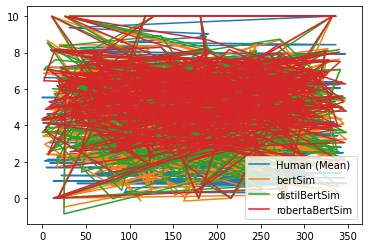

In [89]:
wordsimDF1.sort_values(by=['Human (Mean)']).plot.line()

<AxesSubplot:>

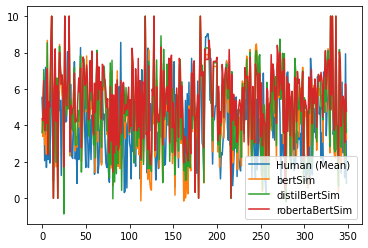

In [90]:
wordsimDF1.plot.line()

In [138]:
# cosine_similarity([encodingsMap['Q847337']], [encodingsMap['Q551800']])

In [92]:
import scipy.stats as stats

In [93]:
stats.kendalltau(wordsimDF1['Human (Mean)'].to_list(), wordsimDF1['bertSim'])

KendalltauResult(correlation=0.37975882843235137, pvalue=5.235465664921023e-26)

In [126]:
stats.kendalltau(wordsimDF1['Human (Mean)'].to_list(), wordsimDF1['bertLargeSim'])

KendalltauResult(correlation=0.37556037504702056, pvalue=1.7903693658447951e-25)

In [94]:
stats.kendalltau(wordsimDF1['Human (Mean)'].to_list(), wordsimDF1['distilBertSim'])

KendalltauResult(correlation=0.3529686820781901, pvalue=1.0899920454225404e-22)

In [139]:
stats.kendalltau(wordsimDF1['Human (Mean)'].to_list(), wordsimDF1['robertaBaseBertSim'])

KendalltauResult(correlation=0.3156122362936971, pvalue=1.8520533516011967e-18)

In [95]:
stats.kendalltau(wordsimDF1['Human (Mean)'].to_list(), wordsimDF1['robertaBertSim'])

KendalltauResult(correlation=0.3583059753020537, pvalue=2.481962318957373e-23)

In [96]:
stats.spearmanr(wordsimDF1['Human (Mean)'].to_list(), wordsimDF1['bertSim'])

SpearmanrResult(correlation=0.5388523544692222, pvalue=1.1269721214604893e-27)

In [127]:
stats.spearmanr(wordsimDF1['Human (Mean)'].to_list(), wordsimDF1['bertLargeSim'])

SpearmanrResult(correlation=0.5316995237579449, pvalue=7.350680368606645e-27)

In [97]:
stats.spearmanr(wordsimDF1['Human (Mean)'].to_list(), wordsimDF1['distilBertSim'])

SpearmanrResult(correlation=0.5043971026064306, pvalue=6.35665360448366e-24)

In [140]:
stats.spearmanr(wordsimDF1['Human (Mean)'].to_list(), wordsimDF1['robertaBaseBertSim'])

SpearmanrResult(correlation=0.4564962071637959, pvalue=2.286865863469491e-19)

In [98]:
stats.spearmanr(wordsimDF1['Human (Mean)'].to_list(), wordsimDF1['robertaBertSim'])

SpearmanrResult(correlation=0.5120576203985243, pvalue=1.0133475563672188e-24)

# Version 1 - Embeddings of Labels

In [64]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import scipy.stats as stats

In [65]:
len(wordsimQNodesListWAbstractsLabelsDF2)

31

In [66]:
wordsimDF1 = wordsimDF.copy()

In [67]:
def getV1Embeddings(modelName):
    model = SentenceTransformer(modelName)
    start = time()
    encodings = model.encode(wordsimQNodesListWAbstractsLabelsDF2.node2_labelsDF.to_list())
    print(time()-start,'s')
    return encodings

def getMap(encodings):
    return {qnode: enc for qnode, enc in zip(wordsimQNodesListWAbstractsLabelsDF2.index.to_list(), encodings)}

def checkSimilarity(row, encodingsMap):
    if row['g_qnode'] in encodingsMap and row['p_qnode'] in encodingsMap:
        return cosine_similarity([encodingsMap[row['g_qnode']]], [encodingsMap[row['p_qnode']]])
    else:
        return 0

def getCoverage(row, encodingsMap):
    if row['g_qnode'] in encodingsMap and row['p_qnode'] in encodingsMap:
        return 1
    else:
        return 0

In [68]:
bertLabelsEnc = getV1Embeddings('bert-base-nli-mean-tokens')
bertLabelsEncMap = getMap(bertLabelsEnc)
wordsimDF1['bertLabelsSim'] = wordsimDF.apply(checkSimilarity, axis=1, args=(bertLabelsEncMap, ))
wordsimDF1['bertLabelsSim'] = wordsimDF1.bertLabelsSim.apply(lambda p: p[0][0] if p != 0 else p)
wordsimDF1.bertLabelsSim *= 10

5.568063735961914 s


In [69]:
cnt = wordsimDF.apply(getCoverage, axis=1, args=(bertLabelsEncMap, )).sum()
cnt, len(wordsimDF), cnt / len(wordsimDF)

(118, 118, 1.0)

In [70]:
stats.kendalltau(wordsimDF1['Human (Mean)'].to_list(), wordsimDF1['bertLabelsSim'])

KeyError: 'Human (Mean)'

In [ ]:
stats.spearmanr(wordsimDF1['Human (Mean)'].to_list(), wordsimDF1['bertLabelsSim'])

# Amandeep's file generation

In [17]:
# q1 = "kgtk query -i ../data/wikidataos.for.text-embedding.tsv.gz --match '(node1)-[]->(node2)' --where 'node1 in [" + ",".join(['"'+word1+'"' for word1 in wordsimQNodesListWAbstractsLabelsDF2.index.to_list()]) + "]' -o ../data/wikidataos.for.text-embedding.subset2.tsv"


In [18]:
# import os
# os.system("screen -dm "+q1)

In [19]:
wikidataOSDF = pd.read_csv('../data/wikidataos.for.text-embedding.subset2.tsv', sep='\t')

In [20]:
wikidataOSDF.head()

,id,node1,label,node2,rank,node2;wikidatatype
0,Q104021-P1245-868aab-b3f18d7b-0,Q104021,P1245,1412,normal,external-id
1,Q104021-P1296-7a59c3-5f49b5a7-0,Q104021,P1296,0108342,normal,external-id
2,Q104021-P1343-Q19180675-e305e6f3-0,Q104021,P1343,Q19180675,normal,wikibase-item
3,Q104021-P1343-Q2657718-2d01d189-0,Q104021,P1343,Q2657718,normal,wikibase-item
4,Q104021-P1343-Q4091875-50bd890f-0,Q104021,P1343,Q4091875,normal,wikibase-item


In [21]:
# !kgtk query -i ../data/wikidataos.for.text-embedding.subset2.tsv \
#     --match '(node1)-[]->()' \
#     --return 'count(distinct node1)'

In [22]:
# !kgtk text-embedding -i ../data/wikidataos.for.text-embedding.subset2.tsv   \
#     --model roberta-large-nli-mean-tokens   \
#     --property-labels-file ../data/labels.en.tsv  --debug   \
#     --isa-properties P31 P279 P106 P39 P1382 P373 P452   \
#     --save-embedding-sentence > ../data/wikidataos-text-embeddings-subset2.tsv

In [23]:
len(set(wordsimQNodesListWAbstractsLabelsDF2.index.to_list()))

418

In [24]:
wikidataOSEmbDF = pd.read_csv('../data/wikidataos-text-embeddings-subset2.tsv', sep='\t')

In [25]:
wikidataOSEmbDF1 = wikidataOSEmbDF[wikidataOSEmbDF.property == 'text_embedding'].loc[:,['node','value']]

In [26]:
wikidataOSEmbDF1.head()

,node,value
0,Q998,"0.50568223,-0.10802102,-0.3486761,0.78598565,-..."
2,Q99496317,"-0.663889,1.3066527,0.7410443,0.7310645,-0.086..."
4,Q98069877,"0.79087067,0.6158045,0.18239851,-0.44384396,-0..."
6,Q964401,"-0.4146536,0.36972183,-0.9731038,0.72235125,0...."
8,Q9635,"0.085437864,0.50590533,-0.7758463,0.575578,1.1..."


# Version 2 - Comparison of cosine similarity measures with Amandeep's original file new pairs

In [27]:
import json

In [28]:
amanEncMap = {row['node']: json.loads('['+row['value']+']') for _, row in wikidataOSEmbDF1.iterrows()}
amanEncSim = wordsimDF.apply(checkSimilarity, axis=1, args=(amanEncMap, ))
wordsimDF1['amanSim'] = amanEncSim * 10
wordsimDF1['amanSim'] = wordsimDF1.amanSim.apply(lambda p: p[0][0] if p != 0 else p)

<ipython-input-28-6aed93388a22>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wordsimDF1['amanSim'] = amanEncSim * 10
<ipython-input-28-6aed93388a22>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wordsimDF1['amanSim'] = wordsimDF1.amanSim.apply(lambda p: p[0][0] if p != 0 else p)


In [29]:
cnt = wordsimDF.apply(getCoverage, axis=1, args=(amanEncMap, )).sum()
cnt, len(wordsimDF), cnt / len(wordsimDF)

(330, 349, 0.9455587392550143)

In [30]:
stats.kendalltau(wordsimDF1['Human (Mean)'].to_list(), wordsimDF1['amanSim'])

KendalltauResult(correlation=0.3654839025870469, pvalue=3.731075991381434e-24)

In [31]:
stats.spearmanr(wordsimDF1['Human (Mean)'].to_list(), wordsimDF1['amanSim'])

SpearmanrResult(correlation=0.5075204852629356, pvalue=3.0234963712614295e-24)

# Version 3 - P31, P279 edges from lexicalized version

In [32]:
# !kgtk text-embedding -i ../data/wikidataos.for.text-embedding.subset2.tsv   \
#     --model roberta-large-nli-mean-tokens   \
#     --property-labels-file ../data/labels.en.tsv  --debug   \
#     --isa-properties P31 P279  \
#     --save-embedding-sentence > ../data/wikidataos-text-embeddings-subset3.tsv

In [33]:
wikidataV3DF = pd.read_csv('../data/wikidataos-text-embeddings-subset3.tsv', sep='\t')

In [34]:
wikidataV3DF = wikidataV3DF[wikidataV3DF.property == 'text_embedding'].loc[:,['node','value']]

In [35]:
wikidataV3DF.head()

,node,value
0,Q998,"0.60533667,-0.32207027,-0.19160181,0.70176995,..."
2,Q99496317,"-0.663889,1.3066527,0.7410443,0.7310645,-0.086..."
4,Q98069877,"0.79087067,0.6158045,0.18239851,-0.44384396,-0..."
6,Q964401,"-0.3510175,0.29355207,-1.0211854,0.35043457,1...."
8,Q9635,"-0.010522888,0.4303582,-0.76446587,0.26379517,..."


In [36]:
import json
wikiV3EncMap = {row['node']: json.loads('['+row['value']+']') for _, row in wikidataV3DF.iterrows()}
wikiV3EncSim = wordsimDF.apply(checkSimilarity, axis=1, args=(wikiV3EncMap, ))
wordsimDF1['wikiV3EncSim'] = wikiV3EncSim * 10
wordsimDF1['wikiV3EncSim'] = wordsimDF1.wikiV3EncSim.apply(lambda p: p[0][0] if p != 0 else p)

<ipython-input-36-7dbb17313628>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wordsimDF1['wikiV3EncSim'] = wikiV3EncSim * 10
<ipython-input-36-7dbb17313628>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wordsimDF1['wikiV3EncSim'] = wordsimDF1.wikiV3EncSim.apply(lambda p: p[0][0] if p != 0 else p)


In [37]:
cnt = wordsimDF.apply(getCoverage, axis=1, args=(wikiV3EncMap, )).sum()
cnt, len(wordsimDF), cnt / len(wordsimDF)

(330, 349, 0.9455587392550143)

In [38]:
stats.kendalltau(wordsimDF1['Human (Mean)'].to_list(), wordsimDF1['wikiV3EncSim'])

KendalltauResult(correlation=0.33429987563573715, pvalue=1.805960166533804e-20)

In [39]:
stats.spearmanr(wordsimDF1['Human (Mean)'].to_list(), wordsimDF1['wikiV3EncSim'])

SpearmanrResult(correlation=0.4737260118146468, pvalue=6.343179394616253e-21)

# Version 4 - First sentence of abstract vs human

In [40]:
from nltk.tokenize import sent_tokenize

In [41]:
len(wordsimQNodesListWAbstractsLabelsDF1)

324

In [42]:
wordsimQNodesListWAbstractsLabelsDF1.abstract.isna().sum()

0

In [43]:
wordsimQNodesListWAbstractsLabelsDF1['abstractFirstSent'] = wordsimQNodesListWAbstractsLabelsDF1.abstract.apply(lambda p: sent_tokenize(p)[0])

In [44]:
wordsimQNodesListWAbstractsLabelsDF1.head()

,index,id,label,node2,ignore,url,ignore2,abstract,node2_labelsDF,abstractFirstSent
node1,,,,,,,,,,
Q8068,Flood,Q8068-wikipedia_sitelink-410669-0,wikipedia_sitelink,http://en.wikipedia.org/wiki/Flood,23841.0,<http://dbpedia.org/resource/Flood>,<http://www.w3.org/2000/01/rdf-schema#comment>,A flood is an overflow of water that submerges...,flood,A flood is an overflow of water that submerges...
Q1368,Money,Q1368-wikipedia_sitelink-59ade8-0,wikipedia_sitelink,http://en.wikipedia.org/wiki/Money,1312979.0,<http://dbpedia.org/resource/Money>,<http://www.w3.org/2000/01/rdf-schema#comment>,Money is any item or verifiable record that is...,money,Money is any item or verifiable record that is...
Q872,Radio,Q872-wikipedia_sitelink-1e49e4-0,wikipedia_sitelink,http://en.wikipedia.org/wiki/Radio,1866867.0,<http://dbpedia.org/resource/Radio>,<http://www.w3.org/2000/01/rdf-schema#comment>,Radio is the technology of signaling and commu...,radio,Radio is the technology of signaling and commu...
Q5070802,Emergency,Q5070802-wikipedia_sitelink-41cebc-0,wikipedia_sitelink,http://en.wikipedia.org/wiki/Emergency,80429.0,<http://dbpedia.org/resource/Emergency>,<http://www.w3.org/2000/01/rdf-schema#comment>,An emergency is a situation that poses an imme...,emergency,An emergency is a situation that poses an imme...
Q213449,Eating,Q213449-wikipedia_sitelink-1e88be-0,wikipedia_sitelink,http://en.wikipedia.org/wiki/Eating,104645.0,<http://dbpedia.org/resource/Eating>,<http://www.w3.org/2000/01/rdf-schema#comment>,Eating (also known as consuming) is the ingest...,eating,Eating (also known as consuming) is the ingest...


In [45]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

In [46]:
def getFirstSentEmbeddings(modelName):
    model = SentenceTransformer(modelName)
    start = time()
    encodings = model.encode(wordsimQNodesListWAbstractsLabelsDF1.abstractFirstSent.to_list())
    print(time()-start,'s')
    return encodings

def getFirstSentMap(encodings):
    return {qnode: enc for qnode, enc in zip(wordsimQNodesListWAbstractsLabelsDF1.index.to_list(), encodings)}

def checkSimilarity(row, encodingsMap):
    if row['g_qnode'] in encodingsMap and row['p_qnode'] in encodingsMap:
        return cosine_similarity([encodingsMap[row['g_qnode']]], [encodingsMap[row['p_qnode']]])
    else:
        return 0

In [47]:
bertV4Enc = getFirstSentEmbeddings('bert-base-nli-mean-tokens')
bertV4EncMap = getFirstSentMap(bertV4Enc)
bertV4EncSim = wordsimDF.apply(checkSimilarity, axis=1, args=(bertV4EncMap, ))
wordsimDF1['bertV4EncSim'] = bertV4EncSim
wordsimDF1['bertV4EncSim'] = wordsimDF1.bertV4EncSim.apply(lambda p: p[0][0] if p != 0 else p)
wordsimDF1.bertV4EncSim *= 10

0.5808649063110352 s


<ipython-input-47-9075dca18092>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wordsimDF1['bertV4EncSim'] = bertV4EncSim
<ipython-input-47-9075dca18092>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wordsimDF1['bertV4EncSim'] = wordsimDF1.bertV4EncSim.apply(lambda p: p[0][0] if p != 0 else p)
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [48]:
cnt = wordsimDF.apply(getCoverage, axis=1, args=(bertV4EncMap, )).sum()
cnt, len(wordsimDF), cnt / len(wordsimDF)

(239, 349, 0.6848137535816619)

In [49]:
wordsimDF1.head()

,Human (Mean),bertLabelsSim,amanSim,wikiV3EncSim,bertV4EncSim
0,5.5360,6.809672,4.949738,5.145601,3.770548
1,4.1250,4.554877,4.818231,3.987047,4.168040
2,6.6250,7.643815,6.407051,5.669631,4.997217
3,2.0625,7.194899,6.186497,6.186497,0.000000
4,7.1875,8.137879,8.556664,9.098408,0.000000


In [50]:
import scipy.stats as stats

In [51]:
stats.kendalltau(wordsimDF1['Human (Mean)'].to_list(), wordsimDF1['bertV4EncSim'])

KendalltauResult(correlation=0.3633652092919623, pvalue=2.1070516667335453e-22)

In [52]:
stats.spearmanr(wordsimDF1['Human (Mean)'].to_list(), wordsimDF1['bertV4EncSim'])

SpearmanrResult(correlation=0.49261494527923566, pvalue=9.798975953928462e-23)

# Version 5 - DBPedia's short abstracts vs Human

In [71]:
len(wordsimQNodesListWAbstractsLabelsDF1)

22

In [72]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

In [73]:
def getAbsEmbeddings(modelName):
    model = SentenceTransformer(modelName)
    start = time()
    encodings = model.encode(wordsimQNodesListWAbstractsLabelsDF1.abstract.to_list())
    print(time()-start,'s')
    return encodings

def getAbsMap(encodings):
    return {qnode: enc for qnode, enc in zip(wordsimQNodesListWAbstractsLabelsDF1.index.to_list(), encodings)}

def checkSimilarity(row, encodingsMap):
    if row['g_qnode'] in encodingsMap and row['p_qnode'] in encodingsMap:
        return cosine_similarity([encodingsMap[row['g_qnode']]], [encodingsMap[row['p_qnode']]])
    else:
        return 0

In [74]:
bertV5Enc = getAbsEmbeddings('bert-base-nli-mean-tokens')
bertV5EncMap = getAbsMap(bertV5Enc)
bertV5EncSim = wordsimDF.apply(checkSimilarity, axis=1, args=(bertV5EncMap, ))
wordsimDF1['bertV5EncSim'] = bertV5EncSim
wordsimDF1['bertV5EncSim'] = wordsimDF1.bertV5EncSim.apply(lambda p: p[0][0] if p != 0 else p)
wordsimDF1.bertV5EncSim *= 10

0.15574932098388672 s


In [75]:
cnt = wordsimDF.apply(getCoverage, axis=1, args=(bertV5EncMap, )).sum()
cnt, len(wordsimDF), cnt / len(wordsimDF)

(58, 118, 0.4915254237288136)

In [76]:
wordsimDF1.head()

,Index,g_qnode,p_qnode,q1_label,q2_label,complex,transe,text,class,node2vec-v0,H_3x6,H_5x8,bertLabelsSim,bertV5EncSim
0,11,Q17221,Q189290,spokesperson,military officer,0.25,0.11,0.62,0.65,0.27,0.68,0.45,5.670399,4.803427
1,3,Q702269,Q2285706,professional,head of government,0.29,0.39,0.59,0.57,0.13,0.47,0.29,4.471632,5.585540
2,5,Q2285706,Q82955,head of government,politician,0.36,0.26,0.84,0.55,0.05,0.61,0.64,7.259848,6.529090
3,11,Q107711,Q189290,firefighter,military officer,0.29,0.22,0.58,0.52,0.34,0.78,0.49,4.595971,4.234194
4,3,Q702269,Q48352,professional,head of state,0.30,0.27,0.61,0.52,0.04,0.49,0.33,5.130080,4.503454


In [77]:
import scipy.stats as stats

In [79]:
# stats.kendalltau(wordsimDF1['Human (Mean)'].to_list(), wordsimDF1['bertV5EncSim'])

In [80]:
# stats.spearmanr(wordsimDF1['Human (Mean)'].to_list(), wordsimDF1['bertV5EncSim'])

# Version 6 - DBPedia's short abstracts + labels vs Human

In [81]:
wordsimQNodesListWAbstractsLabelsDF2.head()

,index,id,label,node2,ignore,url,ignore2,abstract,node2_labelsDF
node1,,,,,,,,,
Q11499147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,political activist,political activist
Q1048835,Political_division,Q1048835-wikipedia_sitelink-a3aa16-0,wikipedia_sitelink,http://en.wikipedia.org/wiki/Political_division,NaN,NaN,NaN,political territorial entity,political territorial entity
Q27096235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,artificial geographic entity,artificial geographic entity
Q48352,Head_of_state,Q48352-wikipedia_sitelink-0ba458-0,wikipedia_sitelink,http://en.wikipedia.org/wiki/Head_of_state,5945.0,<http://dbpedia.org/resource/Head_of_state>,<http://www.w3.org/2000/01/rdf-schema#comment>,A head of state (or chief of state) is the pub...,head of state
Q83307,Minister_(government),Q83307-wikipedia_sitelink-519dcf-0,wikipedia_sitelink,http://en.wikipedia.org/wiki/Minister_(governm...,243508.0,<http://dbpedia.org/resource/Minister_(governm...,<http://www.w3.org/2000/01/rdf-schema#comment>,A minister is a politician who heads a ministr...,minister


In [82]:
len(wordsimQNodesListWAbstractsLabelsDF2)

31

In [83]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

In [84]:
def getAbsLabsEmbeddings(modelName):
    model = SentenceTransformer(modelName)
    start = time()
    encodings = model.encode(wordsimQNodesListWAbstractsLabelsDF2.abstract.to_list())
    print(time()-start,'s')
    return encodings

def getAbsLabsMap(encodings):
    return {qnode: enc for qnode, enc in zip(wordsimQNodesListWAbstractsLabelsDF2.index.to_list(), encodings)}

def checkSimilarity(row, encodingsMap):
    if row['g_qnode'] in encodingsMap and row['p_qnode'] in encodingsMap:
        return cosine_similarity([encodingsMap[row['g_qnode']]], [encodingsMap[row['p_qnode']]])
    else:
        return 0

In [85]:
bertV6Enc = getAbsLabsEmbeddings('bert-base-nli-mean-tokens')
bertV6EncMap = getAbsLabsMap(bertV6Enc)
bertV6EncSim = wordsimDF.apply(checkSimilarity, axis=1, args=(bertV6EncMap, ))
wordsimDF1['bertV6EncSim'] = bertV6EncSim
wordsimDF1['bertV6EncSim'] = wordsimDF1.bertV6EncSim.apply(lambda p: p[0][0] if p != 0 else p)
wordsimDF1.bertV6EncSim *= 10

0.17983198165893555 s


In [86]:
cnt = wordsimDF.apply(getCoverage, axis=1, args=(bertV6EncMap, )).sum()
cnt, len(wordsimDF), cnt / len(wordsimDF)

(118, 118, 1.0)

In [87]:
wordsimDF1.head()

,Index,g_qnode,p_qnode,q1_label,q2_label,complex,transe,text,class,node2vec-v0,H_3x6,H_5x8,bertLabelsSim,bertV5EncSim,bertV6EncSim
0,11,Q17221,Q189290,spokesperson,military officer,0.25,0.11,0.62,0.65,0.27,0.68,0.45,5.670399,4.803427,4.803428
1,3,Q702269,Q2285706,professional,head of government,0.29,0.39,0.59,0.57,0.13,0.47,0.29,4.471632,5.585540,5.585539
2,5,Q2285706,Q82955,head of government,politician,0.36,0.26,0.84,0.55,0.05,0.61,0.64,7.259848,6.529090,6.529088
3,11,Q107711,Q189290,firefighter,military officer,0.29,0.22,0.58,0.52,0.34,0.78,0.49,4.595971,4.234194,4.234195
4,3,Q702269,Q48352,professional,head of state,0.30,0.27,0.61,0.52,0.04,0.49,0.33,5.130080,4.503454,4.503455


In [69]:
import scipy.stats as stats

In [88]:
# stats.kendalltau(wordsimDF1['Human (Mean)'].to_list(), wordsimDF1['bertV6EncSim'])

In [89]:
# stats.spearmanr(wordsimDF1['Human (Mean)'].to_list(), wordsimDF1['bertV6EncSim'])

# Version 7 - 1st sentence + label vs Human

In [90]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import sent_tokenize

In [91]:
wordsimQNodesListWAbstractsLabelsDF2['abstractFirstSent'] = wordsimQNodesListWAbstractsLabelsDF2.abstract.apply(lambda p: sent_tokenize(p)[0])

In [92]:
wordsimQNodesListWAbstractsLabelsDF2.head()

,index,id,label,node2,ignore,url,ignore2,abstract,node2_labelsDF,abstractFirstSent
node1,,,,,,,,,,
Q11499147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,political activist,political activist,political activist
Q1048835,Political_division,Q1048835-wikipedia_sitelink-a3aa16-0,wikipedia_sitelink,http://en.wikipedia.org/wiki/Political_division,NaN,NaN,NaN,political territorial entity,political territorial entity,political territorial entity
Q27096235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,artificial geographic entity,artificial geographic entity,artificial geographic entity
Q48352,Head_of_state,Q48352-wikipedia_sitelink-0ba458-0,wikipedia_sitelink,http://en.wikipedia.org/wiki/Head_of_state,5945.0,<http://dbpedia.org/resource/Head_of_state>,<http://www.w3.org/2000/01/rdf-schema#comment>,A head of state (or chief of state) is the pub...,head of state,A head of state (or chief of state) is the pub...
Q83307,Minister_(government),Q83307-wikipedia_sitelink-519dcf-0,wikipedia_sitelink,http://en.wikipedia.org/wiki/Minister_(governm...,243508.0,<http://dbpedia.org/resource/Minister_(governm...,<http://www.w3.org/2000/01/rdf-schema#comment>,A minister is a politician who heads a ministr...,minister,A minister is a politician who heads a ministr...


In [93]:
def get1stSentLabsEmbeddings(modelName):
    model = SentenceTransformer(modelName)
    start = time()
    encodings = model.encode(wordsimQNodesListWAbstractsLabelsDF2.abstractFirstSent.to_list())
    print(time()-start,'s')
    return encodings

def get1stSentLabsMap(encodings):
    return {qnode: enc for qnode, enc in zip(wordsimQNodesListWAbstractsLabelsDF2.index.to_list(), encodings)}

def checkSimilarity(row, encodingsMap):
    if row['g_qnode'] in encodingsMap and row['p_qnode'] in encodingsMap:
        return cosine_similarity([encodingsMap[row['g_qnode']]], [encodingsMap[row['p_qnode']]])
    else:
        return 0

In [94]:
bertV7Enc = get1stSentLabsEmbeddings('bert-base-nli-mean-tokens')
bertV7EncMap = get1stSentLabsMap(bertV7Enc)
bertV7EncSim = wordsimDF.apply(checkSimilarity, axis=1, args=(bertV7EncMap, ))
wordsimDF1['bertV7EncSim'] = bertV7EncSim
wordsimDF1['bertV7EncSim'] = wordsimDF1.bertV7EncSim.apply(lambda p: p[0][0] if p != 0 else p)
wordsimDF1.bertV7EncSim *= 10

0.14003443717956543 s


In [95]:
cnt = wordsimDF.apply(getCoverage, axis=1, args=(bertV7EncMap, )).sum()
cnt, len(wordsimDF), cnt / len(wordsimDF)

(118, 118, 1.0)

In [96]:
wordsimDF1.head()

,Index,g_qnode,p_qnode,q1_label,q2_label,complex,transe,text,class,node2vec-v0,H_3x6,H_5x8,bertLabelsSim,bertV5EncSim,bertV6EncSim,bertV7EncSim
0,11,Q17221,Q189290,spokesperson,military officer,0.25,0.11,0.62,0.65,0.27,0.68,0.45,5.670399,4.803427,4.803428,6.238037
1,3,Q702269,Q2285706,professional,head of government,0.29,0.39,0.59,0.57,0.13,0.47,0.29,4.471632,5.585540,5.585539,4.817909
2,5,Q2285706,Q82955,head of government,politician,0.36,0.26,0.84,0.55,0.05,0.61,0.64,7.259848,6.529090,6.529088,5.945703
3,11,Q107711,Q189290,firefighter,military officer,0.29,0.22,0.58,0.52,0.34,0.78,0.49,4.595971,4.234194,4.234195,3.154826
4,3,Q702269,Q48352,professional,head of state,0.30,0.27,0.61,0.52,0.04,0.49,0.33,5.130080,4.503454,4.503455,4.739718


In [97]:
import scipy.stats as stats

In [98]:
# stats.kendalltau(wordsimDF1['Human (Mean)'].to_list(), wordsimDF1['bertV7EncSim'])

In [99]:
# stats.spearmanr(wordsimDF1['Human (Mean)'].to_list(), wordsimDF1['bertV7EncSim'])

# Version 8, 9, 10 - complex, transe, text, class

In [82]:
wordsimDF1['complex'] = wordsimDF.complex * 10
wordsimDF1['transe'] = wordsimDF.transe * 10
wordsimDF1['text'] = wordsimDF.text * 10
wordsimDF1['class'] = wordsimDF['class'] * 10

<ipython-input-82-99910acabed9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wordsimDF1['complex'] = wordsimDF.complex * 10
<ipython-input-82-99910acabed9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wordsimDF1['transe'] = wordsimDF.transe * 10
<ipython-input-82-99910acabed9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [83]:
wordsimDF.head()

,Word 1,word1_kg_id,word1_kg_label,word1_kg_description,Word 2,word2_kg_id,word2_kg_label,word2_kg_description,Human (Mean),complex,transe,text,class
0,admission,Q847337,confession,statement made by a person or a group of perso...,ticket,Q551800,ticket,paper or cardboard document showing payment fo...,5.5360,0.361115,0.446632,0.485653,NaN
1,alcohol,Q154,alcoholic beverage,"drink containing alcohols, typically ethanol",chemistry,Q2329,chemistry,branch of physical science concerned with the ...,4.1250,0.302163,0.274388,0.479313,0.005851
2,aluminum,Q663,aluminium,metallic chemical element of silvery appearanc...,metal,Q11426,metal,"element, compound or alloy that is a good cond...",6.6250,0.694462,0.429289,0.626784,0.393657
3,announcement,Q567303,announcement,"printed, spoken, or published statement or not...",effort,Q14536140,exertion,use of physical or perceived energy by a person,2.0625,0.324825,0.379077,0.618644,0.208812
4,announcement,Q567303,announcement,"printed, spoken, or published statement or not...",news,Q38926,news,communication of selected information on curre...,7.1875,0.361214,0.360383,0.863846,0.888621


In [84]:
wordsimDF1 = wordsimDF1.fillna(0)

In [101]:
wordsimDF1['bertLabelsSim'] /= 10
wordsimDF1['bertV5EncSim'] /= 10
wordsimDF1['bertV6EncSim'] /= 10
wordsimDF1['bertV7EncSim'] /= 10

In [102]:
wordsimDF1.head()

,Index,g_qnode,p_qnode,q1_label,q2_label,complex,transe,text,class,node2vec-v0,H_3x6,H_5x8,bertLabelsSim,bertV5EncSim,bertV6EncSim,bertV7EncSim
0,11,Q17221,Q189290,spokesperson,military officer,0.25,0.11,0.62,0.65,0.27,0.68,0.45,0.567040,0.480343,0.480343,0.623804
1,3,Q702269,Q2285706,professional,head of government,0.29,0.39,0.59,0.57,0.13,0.47,0.29,0.447163,0.558554,0.558554,0.481791
2,5,Q2285706,Q82955,head of government,politician,0.36,0.26,0.84,0.55,0.05,0.61,0.64,0.725985,0.652909,0.652909,0.594570
3,11,Q107711,Q189290,firefighter,military officer,0.29,0.22,0.58,0.52,0.34,0.78,0.49,0.459597,0.423419,0.423420,0.315483
4,3,Q702269,Q48352,professional,head of state,0.30,0.27,0.61,0.52,0.04,0.49,0.33,0.513008,0.450345,0.450346,0.473972


In [103]:
wordsimDF1.to_csv('../data/SimIP_new_OP.csv')

In [86]:
wordsimDF1.describe()

,Human (Mean),bertLabelsSim,amanSim,wikiV3EncSim,bertV4EncSim,bertV5EncSim,bertV6EncSim,bertV7EncSim,complex,transe,text,class
count,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000
mean,4.052735,6.361162,5.509827,5.600105,3.272164,3.733567,4.655997,4.464247,4.286958,3.438595,5.578697,1.937397
std,2.044971,1.601204,2.015174,1.995942,2.736918,2.912649,2.279742,2.077533,1.645163,2.033467,2.021548,2.753170
min,0.312500,0.000000,0.000000,0.000000,0.000000,0.000000,-0.483480,-0.526745,0.000000,-1.436633,0.000000,0.000000
25%,2.375000,5.304373,4.548204,4.739625,0.000000,0.000000,3.015642,3.120310,3.317798,2.151662,4.626498,0.145023
50%,3.937500,6.461515,5.597513,5.787425,3.463857,4.437084,4.774273,4.206756,4.171686,3.240109,5.767745,0.639914
75%,5.375000,7.399760,6.735863,6.744476,5.183337,5.999169,6.218609,5.675579,4.996030,4.731990,6.812977,2.350565
max,10.000000,10.000002,10.000000,10.000000,10.000002,10.000001,10.000001,10.000002,10.000000,10.000000,10.000000,10.000000


# Agreement Matrix

In [87]:
versionNames = ['bertLabelsSim', 'amanSim', 'wikiV3EncSim', 'bertV4EncSim', 'bertV5EncSim', 'bertV6EncSim', 'bertV7EncSim', 'complex', 'transe', 'text', 'class']

In [88]:
kendallAM = []
spearmanAM = []
for ver in versionNames:
    kAMTemp = []
    sAMTemp = []
    for ver2 in versionNames:
        kAMTemp.append(stats.kendalltau(wordsimDF1[ver], wordsimDF1[ver2]).correlation)
        sAMTemp.append(stats.spearmanr(wordsimDF1[ver], wordsimDF1[ver2]).correlation)
    kendallAM.append(kAMTemp)
    spearmanAM.append(sAMTemp)

In [89]:
kendallAMDF = pd.DataFrame(kendallAM, columns=['Version '+str(i+1) for i in range(len(versionNames))], index=['Version '+str(i+1) for i in range(len(versionNames))])

In [90]:
kendallAMDF

,Version 1,Version 2,Version 3,Version 4,Version 5,Version 6,Version 7,Version 8,Version 9,Version 10,Version 11
Version 1,1.000000,0.412089,0.383523,0.160567,0.146498,0.287018,0.383673,0.208911,0.209933,0.400400,0.174948
Version 2,0.412089,1.000000,0.838947,0.296893,0.266232,0.369277,0.458566,0.309217,0.247839,0.912377,0.238586
Version 3,0.383523,0.838947,1.000000,0.275386,0.250581,0.351252,0.429853,0.304272,0.249097,0.839894,0.235619
Version 4,0.160567,0.296893,0.275386,1.000000,0.820504,0.611740,0.619886,0.229670,0.135532,0.299409,0.259318
Version 5,0.146498,0.266232,0.250581,0.820504,1.000000,0.782150,0.449513,0.246373,0.143346,0.269472,0.248043
Version 6,0.287018,0.369277,0.351252,0.611740,0.782150,1.000000,0.650565,0.265199,0.201692,0.368089,0.220891
Version 7,0.383673,0.458566,0.429853,0.619886,0.449513,0.650565,1.000000,0.260021,0.239819,0.453371,0.241190
Version 8,0.208911,0.309217,0.304272,0.229670,0.246373,0.265199,0.260021,1.000000,0.447656,0.309583,0.334855
Version 9,0.209933,0.247839,0.249097,0.135532,0.143346,0.201692,0.239819,0.447656,1.000000,0.244593,0.255377
Version 10,0.400400,0.912377,0.839894,0.299409,0.269472,0.368089,0.453371,0.309583,0.244593,1.000000,0.232037


In [91]:
spearmanAMDF = pd.DataFrame(spearmanAM, columns=['Version '+str(i+1) for i in range(len(versionNames))], index=['Version '+str(i+1) for i in range(len(versionNames))])

In [92]:
spearmanAMDF

,Version 1,Version 2,Version 3,Version 4,Version 5,Version 6,Version 7,Version 8,Version 9,Version 10,Version 11
Version 1,1.000000,0.576425,0.539416,0.213744,0.192074,0.400162,0.532950,0.301924,0.305490,0.563628,0.253590
Version 2,0.576425,1.000000,0.959002,0.392378,0.350908,0.515853,0.628626,0.440326,0.352366,0.985972,0.339260
Version 3,0.539416,0.959002,1.000000,0.371106,0.337087,0.493746,0.596281,0.430792,0.352982,0.959131,0.336037
Version 4,0.213744,0.392378,0.371106,1.000000,0.946527,0.733577,0.628222,0.325008,0.189124,0.399380,0.355801
Version 5,0.192074,0.350908,0.337087,0.946527,1.000000,0.793177,0.556256,0.343765,0.203396,0.356645,0.343931
Version 6,0.400162,0.515853,0.493746,0.733577,0.793177,1.000000,0.829959,0.381097,0.298756,0.513084,0.321041
Version 7,0.532950,0.628626,0.596281,0.628222,0.556256,0.829959,1.000000,0.373446,0.347957,0.624048,0.345162
Version 8,0.301924,0.440326,0.430792,0.325008,0.343765,0.381097,0.373446,1.000000,0.619056,0.439102,0.477997
Version 9,0.305490,0.352366,0.352982,0.189124,0.203396,0.298756,0.347957,0.619056,1.000000,0.346778,0.364509
Version 10,0.563628,0.985972,0.959131,0.399380,0.356645,0.513084,0.624048,0.439102,0.346778,1.000000,0.333301


In [93]:
kendallAMDF.to_csv('../data/kendallAMDF.csv')
spearmanAMDF.to_csv('../data/spearmanAMDF.csv')

In [94]:
for ver in versionNames:
    wordsimDF[ver] = wordsimDF1[ver]

In [95]:
wordsimDF.head()

,Word 1,word1_kg_id,word1_kg_label,word1_kg_description,Word 2,word2_kg_id,word2_kg_label,word2_kg_description,Human (Mean),complex,transe,text,class,bertLabelsSim,amanSim,wikiV3EncSim,bertV4EncSim,bertV5EncSim,bertV6EncSim,bertV7EncSim
0,admission,Q847337,confession,statement made by a person or a group of perso...,ticket,Q551800,ticket,paper or cardboard document showing payment fo...,5.5360,3.611154,4.466324,4.856529,0.000000,6.809672,4.949738,5.145601,3.770548,4.268633,4.268633,3.770548
1,alcohol,Q154,alcoholic beverage,"drink containing alcohols, typically ethanol",chemistry,Q2329,chemistry,branch of physical science concerned with the ...,4.1250,3.021635,2.743883,4.793135,0.058511,4.554877,4.818231,3.987047,4.168040,3.399217,3.399217,4.168040
2,aluminum,Q663,aluminium,metallic chemical element of silvery appearanc...,metal,Q11426,metal,"element, compound or alloy that is a good cond...",6.6250,6.944618,4.292894,6.267841,3.936571,7.643815,6.407051,5.669631,4.997217,6.865782,6.865782,4.997217
3,announcement,Q567303,announcement,"printed, spoken, or published statement or not...",effort,Q14536140,exertion,use of physical or perceived energy by a person,2.0625,3.248249,3.790767,6.186442,2.088125,7.194899,6.186497,6.186497,0.000000,0.000000,2.961755,5.296330
4,announcement,Q567303,announcement,"printed, spoken, or published statement or not...",news,Q38926,news,communication of selected information on curre...,7.1875,3.612144,3.603834,8.638458,8.886211,8.137879,8.556664,9.098408,0.000000,0.000000,3.408112,5.621890


In [96]:
wordsimDF.to_csv('../data/wordsim_updated.csv')

# Part 2 - Pedro's updated file

In [98]:
wordsimDFNew = pd.read_csv('../data/SimIP_new.csv')

In [ ]:
list(set(wordsimDFNew['g_qnode'].to_list() + wordsimDFNew['p_qnode'].to_list()))

# Version 1 - Embeddings of Labels

In [9]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import scipy.stats as stats

In [12]:
def getV1Embeddings(modelName):
    model = SentenceTransformer(modelName)
    start = time()
    encodings = model.encode(wordsimQNodesListWAbstractsLabelsDF2.node2_labelsDF.to_list())
    print(time()-start,'s')
    return encodings

def getMap(encodings):
    return {qnode: enc for qnode, enc in zip(wordsimQNodesListWAbstractsLabelsDF2.index.to_list(), encodings)}

def checkSimilarity(row, encodingsMap):
    if row['g_qnode'] in encodingsMap and row['p_qnode'] in encodingsMap:
        return cosine_similarity([encodingsMap[row['g_qnode']]], [encodingsMap[row['p_qnode']]])
    else:
        return 0

def getCoverage(row, encodingsMap):
    if row['g_qnode'] in encodingsMap and row['p_qnode'] in encodingsMap:
        return 1
    else:
        return 0

In [13]:
bertLabelsEnc = getV1Embeddings('bert-base-nli-mean-tokens')
bertLabelsEncMap = getMap(bertLabelsEnc)
wordsimDF1['bertLabelsSim'] = wordsimDF.apply(checkSimilarity, axis=1, args=(bertLabelsEncMap, ))
wordsimDF1['bertLabelsSim'] = wordsimDF1.bertLabelsSim.apply(lambda p: p[0][0] if p != 0 else p)
wordsimDF1.bertLabelsSim *= 10

4.580217361450195 s


<ipython-input-13-d93d87c23bc8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wordsimDF1['bertLabelsSim'] = wordsimDF.apply(checkSimilarity, axis=1, args=(bertLabelsEncMap, ))
<ipython-input-13-d93d87c23bc8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wordsimDF1['bertLabelsSim'] = wordsimDF1.bertLabelsSim.apply(lambda p: p[0][0] if p != 0 else p)
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on 

In [14]:
cnt = wordsimDF.apply(getCoverage, axis=1, args=(bertLabelsEncMap, )).sum()
cnt, len(wordsimDF), cnt / len(wordsimDF)

(345, 349, 0.9885386819484241)

In [15]:
stats.kendalltau(wordsimDF1['Human (Mean)'].to_list(), wordsimDF1['bertLabelsSim'])

KendalltauResult(correlation=0.25719783185089823, pvalue=9.11953585838357e-13)

In [16]:
stats.spearmanr(wordsimDF1['Human (Mean)'].to_list(), wordsimDF1['bertLabelsSim'])

SpearmanrResult(correlation=0.37036443456409784, pvalue=8.677074016866423e-13)

# Version 6 - DBPedia's short abstracts + labels vs Human

In [62]:
wordsimQNodesListWAbstractsLabelsDF2.head()

,index,id,label,node2,ignore,url,ignore2,abstract,node2_labelsDF
node1,,,,,,,,,
Q1514190,School_holiday,Q1514190-wikipedia_sitelink-a7b9f1-0,wikipedia_sitelink,http://en.wikipedia.org/wiki/School_holiday,NaN,NaN,NaN,school holiday,school holiday
Q8068,Flood,Q8068-wikipedia_sitelink-410669-0,wikipedia_sitelink,http://en.wikipedia.org/wiki/Flood,23841.0,<http://dbpedia.org/resource/Flood>,<http://www.w3.org/2000/01/rdf-schema#comment>,A flood is an overflow of water that submerges...,flood
Q1368,Money,Q1368-wikipedia_sitelink-59ade8-0,wikipedia_sitelink,http://en.wikipedia.org/wiki/Money,1312979.0,<http://dbpedia.org/resource/Money>,<http://www.w3.org/2000/01/rdf-schema#comment>,Money is any item or verifiable record that is...,money
Q872,Radio,Q872-wikipedia_sitelink-1e49e4-0,wikipedia_sitelink,http://en.wikipedia.org/wiki/Radio,1866867.0,<http://dbpedia.org/resource/Radio>,<http://www.w3.org/2000/01/rdf-schema#comment>,Radio is the technology of signaling and commu...,radio
Q5070802,Emergency,Q5070802-wikipedia_sitelink-41cebc-0,wikipedia_sitelink,http://en.wikipedia.org/wiki/Emergency,80429.0,<http://dbpedia.org/resource/Emergency>,<http://www.w3.org/2000/01/rdf-schema#comment>,An emergency is a situation that poses an imme...,emergency


In [63]:
len(wordsimQNodesListWAbstractsLabelsDF2)

418

In [64]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

In [65]:
def getAbsLabsEmbeddings(modelName):
    model = SentenceTransformer(modelName)
    start = time()
    encodings = model.encode(wordsimQNodesListWAbstractsLabelsDF2.abstract.to_list())
    print(time()-start,'s')
    return encodings

def getAbsLabsMap(encodings):
    return {qnode: enc for qnode, enc in zip(wordsimQNodesListWAbstractsLabelsDF2.index.to_list(), encodings)}

def checkSimilarity(row, encodingsMap):
    if row['g_qnode'] in encodingsMap and row['p_qnode'] in encodingsMap:
        return cosine_similarity([encodingsMap[row['g_qnode']]], [encodingsMap[row['p_qnode']]])
    else:
        return 0

In [66]:
bertV6Enc = getAbsLabsEmbeddings('bert-base-nli-mean-tokens')
bertV6EncMap = getAbsLabsMap(bertV6Enc)
bertV6EncSim = wordsimDF.apply(checkSimilarity, axis=1, args=(bertV6EncMap, ))
wordsimDF1['bertV6EncSim'] = bertV6EncSim
wordsimDF1['bertV6EncSim'] = wordsimDF1.bertV6EncSim.apply(lambda p: p[0][0] if p != 0 else p)
wordsimDF1.bertV6EncSim *= 10

0.902165412902832 s


<ipython-input-66-ef38b58ef6d6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wordsimDF1['bertV6EncSim'] = bertV6EncSim
<ipython-input-66-ef38b58ef6d6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wordsimDF1['bertV6EncSim'] = wordsimDF1.bertV6EncSim.apply(lambda p: p[0][0] if p != 0 else p)
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [67]:
cnt = wordsimDF.apply(getCoverage, axis=1, args=(bertV6EncMap, )).sum()
cnt, len(wordsimDF), cnt / len(wordsimDF)

(345, 349, 0.9885386819484241)

In [68]:
wordsimDF1.head()

,Human (Mean),bertLabelsSim,amanSim,wikiV3EncSim,bertV4EncSim,bertV5EncSim,bertV6EncSim
0,5.5360,6.809672,4.949738,5.145601,3.770548,4.268633,4.268633
1,4.1250,4.554877,4.818231,3.987047,4.168040,3.399217,3.399217
2,6.6250,7.643815,6.407051,5.669631,4.997217,6.865782,6.865782
3,2.0625,7.194899,6.186497,6.186497,0.000000,0.000000,2.961755
4,7.1875,8.137879,8.556664,9.098408,0.000000,0.000000,3.408112


In [69]:
import scipy.stats as stats

In [70]:
stats.kendalltau(wordsimDF1['Human (Mean)'].to_list(), wordsimDF1['bertV6EncSim'])

KendalltauResult(correlation=0.37975882843235137, pvalue=5.235465664921023e-26)

In [71]:
stats.spearmanr(wordsimDF1['Human (Mean)'].to_list(), wordsimDF1['bertV6EncSim'])

SpearmanrResult(correlation=0.5388523544692222, pvalue=1.1269721214604893e-27)

# Version 7 - 1st sentence + label vs Human

In [72]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import sent_tokenize

In [73]:
wordsimQNodesListWAbstractsLabelsDF2['abstractFirstSent'] = wordsimQNodesListWAbstractsLabelsDF2.abstract.apply(lambda p: sent_tokenize(p)[0])

In [74]:
wordsimQNodesListWAbstractsLabelsDF2.head()

,index,id,label,node2,ignore,url,ignore2,abstract,node2_labelsDF,abstractFirstSent
node1,,,,,,,,,,
Q1514190,School_holiday,Q1514190-wikipedia_sitelink-a7b9f1-0,wikipedia_sitelink,http://en.wikipedia.org/wiki/School_holiday,NaN,NaN,NaN,school holiday,school holiday,school holiday
Q8068,Flood,Q8068-wikipedia_sitelink-410669-0,wikipedia_sitelink,http://en.wikipedia.org/wiki/Flood,23841.0,<http://dbpedia.org/resource/Flood>,<http://www.w3.org/2000/01/rdf-schema#comment>,A flood is an overflow of water that submerges...,flood,A flood is an overflow of water that submerges...
Q1368,Money,Q1368-wikipedia_sitelink-59ade8-0,wikipedia_sitelink,http://en.wikipedia.org/wiki/Money,1312979.0,<http://dbpedia.org/resource/Money>,<http://www.w3.org/2000/01/rdf-schema#comment>,Money is any item or verifiable record that is...,money,Money is any item or verifiable record that is...
Q872,Radio,Q872-wikipedia_sitelink-1e49e4-0,wikipedia_sitelink,http://en.wikipedia.org/wiki/Radio,1866867.0,<http://dbpedia.org/resource/Radio>,<http://www.w3.org/2000/01/rdf-schema#comment>,Radio is the technology of signaling and commu...,radio,Radio is the technology of signaling and commu...
Q5070802,Emergency,Q5070802-wikipedia_sitelink-41cebc-0,wikipedia_sitelink,http://en.wikipedia.org/wiki/Emergency,80429.0,<http://dbpedia.org/resource/Emergency>,<http://www.w3.org/2000/01/rdf-schema#comment>,An emergency is a situation that poses an imme...,emergency,An emergency is a situation that poses an imme...


In [75]:
def get1stSentLabsEmbeddings(modelName):
    model = SentenceTransformer(modelName)
    start = time()
    encodings = model.encode(wordsimQNodesListWAbstractsLabelsDF2.abstractFirstSent.to_list())
    print(time()-start,'s')
    return encodings

def get1stSentLabsMap(encodings):
    return {qnode: enc for qnode, enc in zip(wordsimQNodesListWAbstractsLabelsDF2.index.to_list(), encodings)}

def checkSimilarity(row, encodingsMap):
    if row['g_qnode'] in encodingsMap and row['p_qnode'] in encodingsMap:
        return cosine_similarity([encodingsMap[row['g_qnode']]], [encodingsMap[row['p_qnode']]])
    else:
        return 0

In [76]:
bertV7Enc = get1stSentLabsEmbeddings('bert-base-nli-mean-tokens')
bertV7EncMap = get1stSentLabsMap(bertV7Enc)
bertV7EncSim = wordsimDF.apply(checkSimilarity, axis=1, args=(bertV7EncMap, ))
wordsimDF1['bertV7EncSim'] = bertV7EncSim
wordsimDF1['bertV7EncSim'] = wordsimDF1.bertV7EncSim.apply(lambda p: p[0][0] if p != 0 else p)
wordsimDF1.bertV7EncSim *= 10

0.48781871795654297 s


<ipython-input-76-ef0e3d1b2360>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wordsimDF1['bertV7EncSim'] = bertV7EncSim
<ipython-input-76-ef0e3d1b2360>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wordsimDF1['bertV7EncSim'] = wordsimDF1.bertV7EncSim.apply(lambda p: p[0][0] if p != 0 else p)
/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [77]:
cnt = wordsimDF.apply(getCoverage, axis=1, args=(bertV7EncMap, )).sum()
cnt, len(wordsimDF), cnt / len(wordsimDF)

(345, 349, 0.9885386819484241)

In [78]:
wordsimDF1.head()

,Human (Mean),bertLabelsSim,amanSim,wikiV3EncSim,bertV4EncSim,bertV5EncSim,bertV6EncSim,bertV7EncSim
0,5.5360,6.809672,4.949738,5.145601,3.770548,4.268633,4.268633,3.770548
1,4.1250,4.554877,4.818231,3.987047,4.168040,3.399217,3.399217,4.168040
2,6.6250,7.643815,6.407051,5.669631,4.997217,6.865782,6.865782,4.997217
3,2.0625,7.194899,6.186497,6.186497,0.000000,0.000000,2.961755,5.296330
4,7.1875,8.137879,8.556664,9.098408,0.000000,0.000000,3.408112,5.621890


In [79]:
import scipy.stats as stats

In [80]:
stats.kendalltau(wordsimDF1['Human (Mean)'].to_list(), wordsimDF1['bertV7EncSim'])

KendalltauResult(correlation=0.3793557735858387, pvalue=5.886665529373508e-26)

In [81]:
stats.spearmanr(wordsimDF1['Human (Mean)'].to_list(), wordsimDF1['bertV7EncSim'])

SpearmanrResult(correlation=0.5330950015966213, pvalue=5.11634460488722e-27)